In [1]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

numpy version  -  1.20.3
pandas version -  1.3.4


- 파이차트
- 질적자료에 대한 시각화 방법으로 자주 사용됨!!

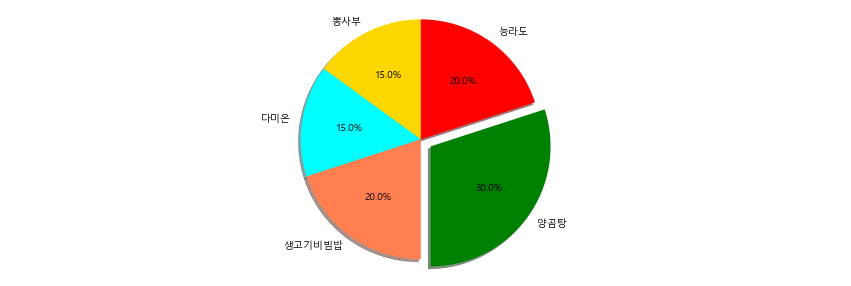

In [23]:
datas  = [15, 15, 20, 30, 20]
labels = ['뽕사부' , '다미온' , '생고기비빔밥' , '양곰탕' , '능라도'] 
colors = ['gold' , 'cyan' , 'coral' , 'green' , 'red']

plt.figure( figsize = (15, 5))
plt.style.use('ggplot')

explode = (0, 0, 0, 0.1, 0)

plt.pie(datas , 
        labels = labels , 
        colors = colors , 
        shadow = True , 
        autopct = '%1.1f%%' , 
        startangle = 90 , 
        explode = explode)

plt.axis('equal')
plt.show()
plt.close()


In [24]:
mpg_frm = pd.read_csv('./visualization_data/auto-mpg.csv' , header = None)
mpg_frm.columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower' , 'weight' , 'acceleration' , 'model year' , 'origin' , 'name']
mpg_frm

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [25]:
mpg_frm['cnt'] = 1
mpg_frm

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [32]:
print('제조국으로 그룹을 지어서 라벨인덱스 변경 - ')
print('1 -> USA , 2 -> KOR , 3 -> EU ')

# mpg_frm['origin'].unique()

origin_grp = mpg_frm.groupby('origin').sum()
origin_grp.index = ['USA' , 'KOR' , 'EU']
origin_grp

제조국으로 그룹을 지어서 라벨인덱스 변경 - 
1 -> USA , 2 -> KOR , 3 -> EU 


,mpg,cylinders,displacement,weight,acceleration,model year,cnt
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
KOR,1952.4,291,7640.0,169631.0,1175.1,5307,70
EU,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [34]:
print('실린더로 그룹을 지어서 라벨인덱스 변경 -  8 -> cyl8 , 4 -> cyl4') 

cyl_grp = mpg_frm.groupby('cylinders').sum()
cyl_grp.index = ['cyl3' , 'cyl4' , 'cyl5' , 'cyl6' , 'cyl8']
cyl_grp

실린더로 그룹을 지어서 라벨인덱스 변경 -  8 -> cyl8 , 4 -> cyl4


,mpg,displacement,weight,acceleration,model year,origin,cnt
cyl3,82.2,290.0,9594.0,53.0,302,12,4
cyl4,5974.5,22398.5,470858.0,3386.7,15723,405,204
cyl5,82.1,435.0,9310.0,55.9,237,6,3
cyl6,1678.8,18324.0,268651.0,1366.1,6378,100,84
cyl8,1541.2,35536.0,423816.0,1334.4,7612,103,103


요구사항 - 
제조국별 차량 생산량을 파이차트로 시각화 한다면? - 


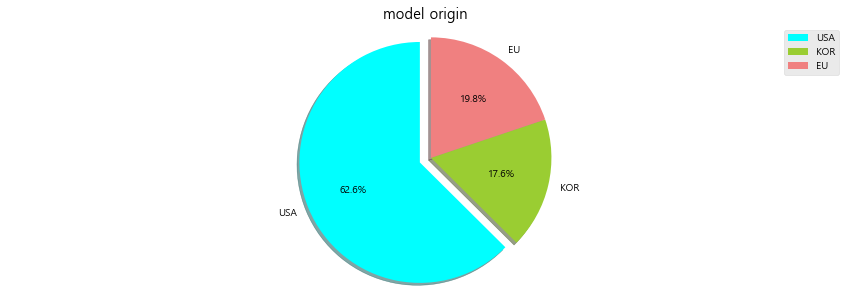

In [41]:
print('요구사항 - ')
print('제조국별 차량 생산량을 파이차트로 시각화 한다면? - ') 

plt.figure( figsize = (15, 5))
plt.style.use('ggplot')

explode = (0.1, 0 , 0 )
colors  = ['cyan' , 'yellowgreen' , 'lightcoral'] 
plt.pie(origin_grp['cnt'] , 
        labels = origin_grp.index ,
        shadow = True , 
        autopct = '%1.1f%%' , 
        startangle = 90 ,
        explode = explode , 
        colors = colors)

plt.title('model origin')
plt.legend(labels = origin_grp.index , loc = 'best')

plt.axis('equal')
plt.show()
plt.close()


제조국과 실린더별 파일 구현 - 
조건 - subplot 구현 (1,2) 



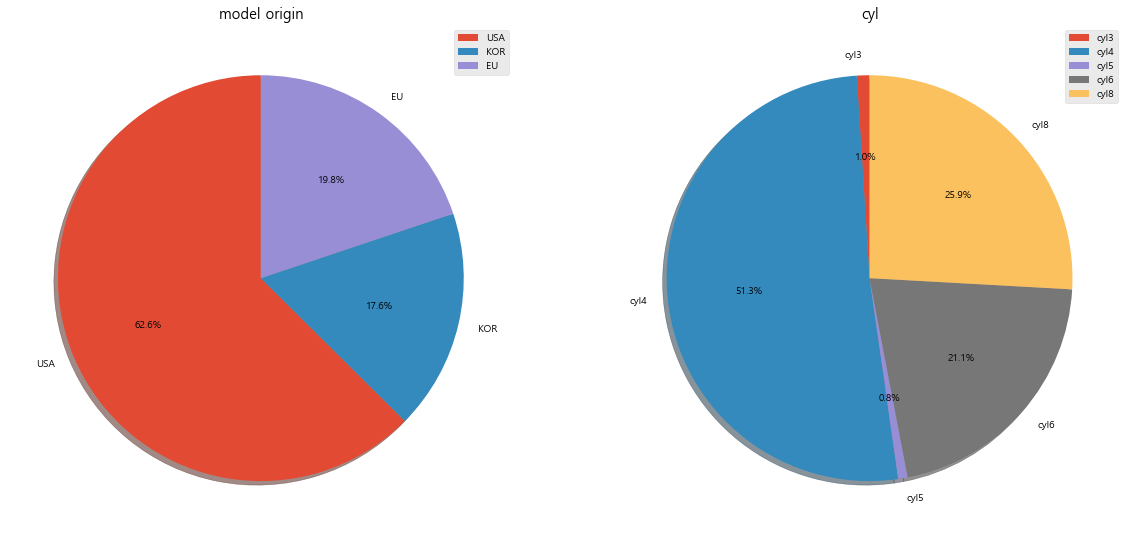

In [46]:
print('제조국과 실린더별 파일 구현 - ')
print('조건 - subplot 구현 (1,2) ')
print()

datas = origin_grp.cnt
labels = origin_grp.index

datas2 = cyl_grp.cnt
labels2 = cyl_grp.index

fig = plt.figure( figsize = (20, 10)) 

ax01 = fig.add_subplot(1,2,1) 
ax02 = fig.add_subplot(1,2,2)

ax01.pie(datas, 
        labels = labels, 
        shadow = True, 
        autopct = '%1.1f%%',
        startangle = 90)

ax01.set_title('model origin')
ax01.legend(labels = origin_grp.index , loc = 'best')

ax02.pie(datas2, 
        labels = labels2, 
        shadow = True, 
        autopct = '%1.1f%%',
        startangle = 90)

ax02.set_title('cyl')
ax02.legend(labels = cyl_grp.index , loc = 'best')

plt.show()
plt.close()


- hist : 구간에 대한 데이터 집계 및 분포
- 변수가 하나인 단변수 데이터의 빈도수를 시각화할 때    

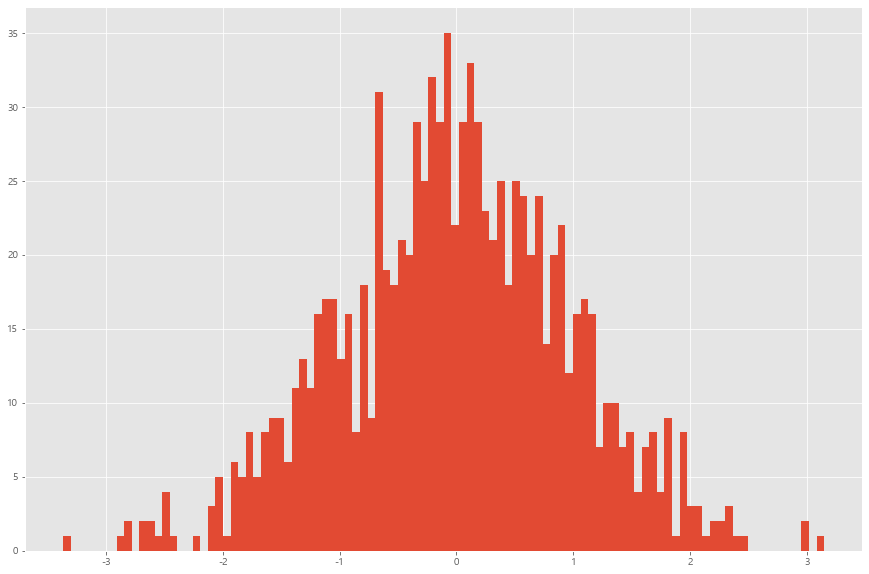

In [50]:
datas = np.random.randn(1000)

plt.figure( figsize = (15, 10))

plt.hist(datas , bins = 100)

plt.show()
plt.close()

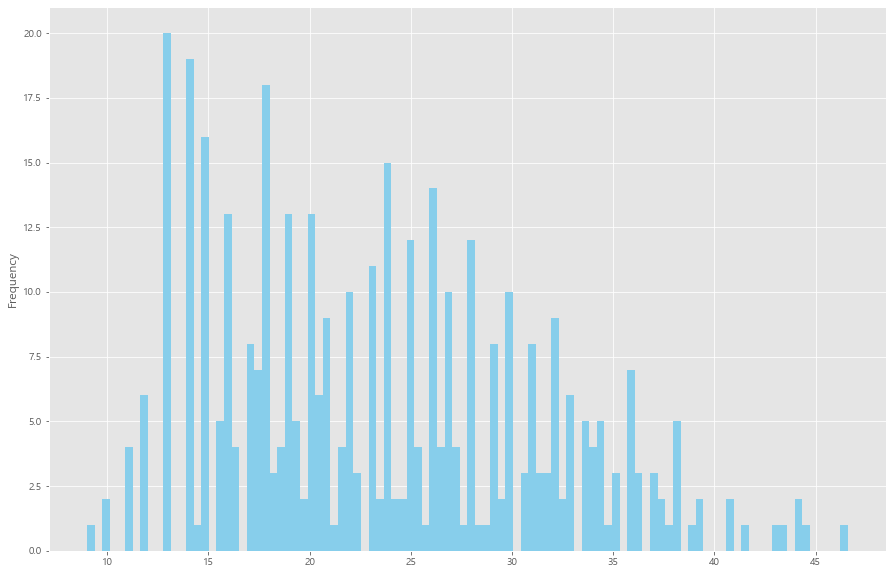

In [53]:
plt.figure( figsize = (15, 10))

# plt.hist(mpg_frm['mpg'] , bins = 100)
mpg_frm['mpg'].plot(kind = 'hist' , bins = 100 , color = 'skyblue')
plt.show()
plt.close()

- scatter plot
- 2차원 데이터 , 집합의 상관관계를 확인할 때
- 점 하나가 데이터의 위치(x, y) 

[ 0.74423257 -1.3777856   0.48312551 -0.07143414  0.24797489 -0.51200066
  0.4525086  -0.29691277 -1.23922154  0.93121622  1.03979452 -1.22189202
  0.33335958  2.19954745 -0.3186886   1.14171919  1.0619817  -0.22976804
 -1.34100167  0.68292188 -0.88704415 -0.26884668  0.20502659  1.19641889
 -1.63519407  0.70708029 -0.0223414   0.11839984  0.66645935 -0.90726339
  1.81821062  1.63150041  1.10275012  0.37180937  0.46885936  0.56408064
 -0.68614059  0.62288843  1.5602965  -2.70165549 -0.44324631 -1.79710382
  0.36641299 -0.80411187  0.00786207  1.28163077 -0.45237934 -0.64019527
 -0.46866239  1.20919095  1.34816529 -0.06395157 -0.35673197 -1.62414275
  0.06115868 -2.08472957  0.8308804   1.18278453 -0.62248688 -0.67779825
  0.44564694 -1.6767742   0.72603505  0.60958166  0.33833314 -0.48781478
  0.23975712 -1.14812818 -0.46456709 -0.21344746  1.43076627  0.21542178
 -0.29131263 -1.31595486 -0.884735    0.15185091  0.94946155  1.0657655
  0.26103819  0.15592123  1.93370093 -0.82271029 -0.

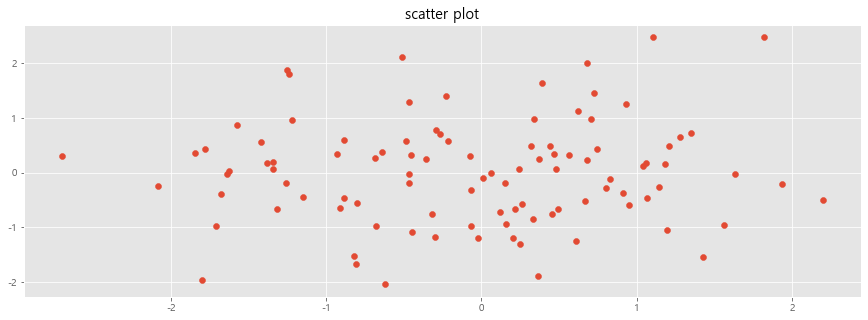

In [62]:
X = np.random.normal(0, 1, 100)
print( X )
print()
Y = np.random.normal(0, 1, 100)
print( Y )

plt.figure( figsize = (15, 5))


plt.scatter(X, Y)

plt.title('scatter plot')
plt.show()
plt.close()

- plt.imshow()

In [63]:
from sklearn.datasets import load_digits

In [69]:
digits = load_digits()
print(' type - ' , type(digits) )
print(' keys - ' , digits.keys)


 type -  <class 'sklearn.utils.Bunch'>
 keys -  <built-in method keys of Bunch object at 0x000002A55F348220>


In [71]:
img = digits.images[0]
img

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

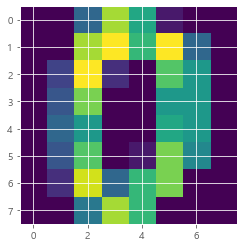

In [72]:
plt.imshow(img)

- koweps_visualization.xlsx [실습]

In [73]:
tmp_frm = pd.read_excel('./visualization_data/koweps_visualization.xlsx' , header = 0   )
tmp_frm

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


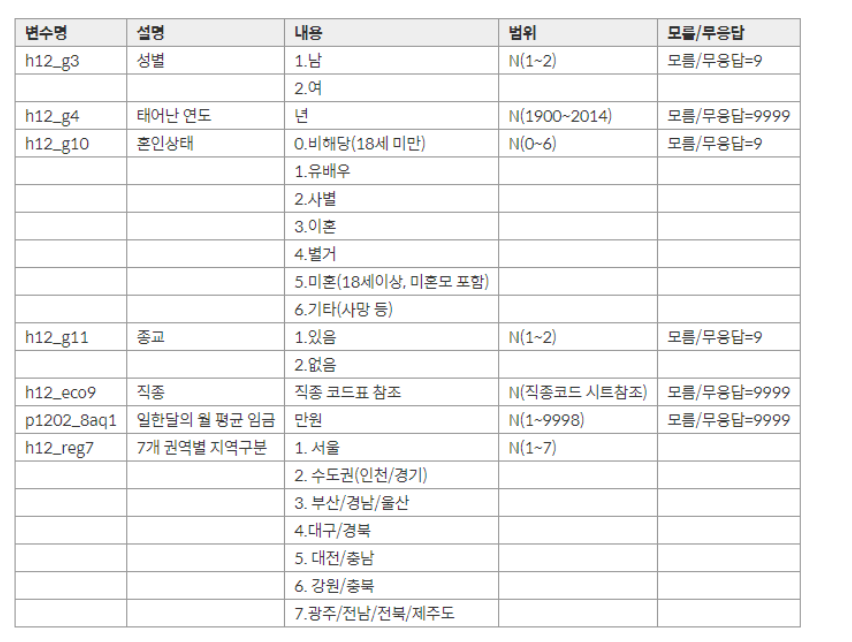

In [75]:
from IPython.display import Image
Image('c:/img/koweps_img.png' , width = 700)

In [76]:
koweps = tmp_frm.copy()
koweps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


In [78]:
koweps_subset = koweps[['h12_g3' , 'h12_g4' , 'h12_g10' , 'h12_g11' , 'h12_eco9' , 'p1202_8aq1' , 'h12_reg7']]
koweps_subset.columns = ['성별' , '태어난 연도' , '혼인상태' , '종교' , '직종' , '일한달의 월 평균 임금' , '7개 권역별 지역구분']
koweps_subset

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


In [79]:
koweps_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   성별            15422 non-null  int64  
 1   태어난 연도        15422 non-null  int64  
 2   혼인상태          15422 non-null  int64  
 3   종교            15422 non-null  int64  
 4   직종            7131 non-null   float64
 5   일한달의 월 평균 임금  4507 non-null   float64
 6   7개 권역별 지역구분   15422 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 843.5 KB


In [82]:
print('조사 대상자들에 대한 성별 분포를 막대그래프로 시각화 한다면? - ') 

조사 대상자들에 대한 성별 분포를 막대그래프로 시각화 한다면? - 


In [86]:
# filter()
# np.where()
# koweps_subset[['성별']]
koweps_subset.filter(['성별'])

,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [91]:
koweps_subset['성별2'] = np.where(koweps_subset.filter(['성별']) == 1 , '남자' , '여자')
koweps_subset.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,성별2
0,2,1936,2,2,NaN,NaN,1,여자
1,2,1945,2,2,NaN,NaN,1,여자
2,1,1948,2,2,NaN,NaN,1,남자
3,1,1942,3,1,762.0,108.9,1,남자
4,2,1923,2,1,NaN,NaN,1,여자


In [92]:
koweps_subset['성별3'] = koweps_subset['성별'].apply(lambda gender : '남자' if gender == 1 else '여자' )
koweps_subset.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,성별2,성별3
0,2,1936,2,2,NaN,NaN,1,여자,여자
1,2,1945,2,2,NaN,NaN,1,여자,여자
2,1,1948,2,2,NaN,NaN,1,남자,남자
3,1,1942,3,1,762.0,108.9,1,남자,남자
4,2,1923,2,1,NaN,NaN,1,여자,여자


In [95]:
gender_frm = pd.DataFrame( koweps_subset['성별3'].value_counts() )
gender_frm.columns = ['명']
gender_frm

,명
여자,8440
남자,6982


0 8440
1 6982


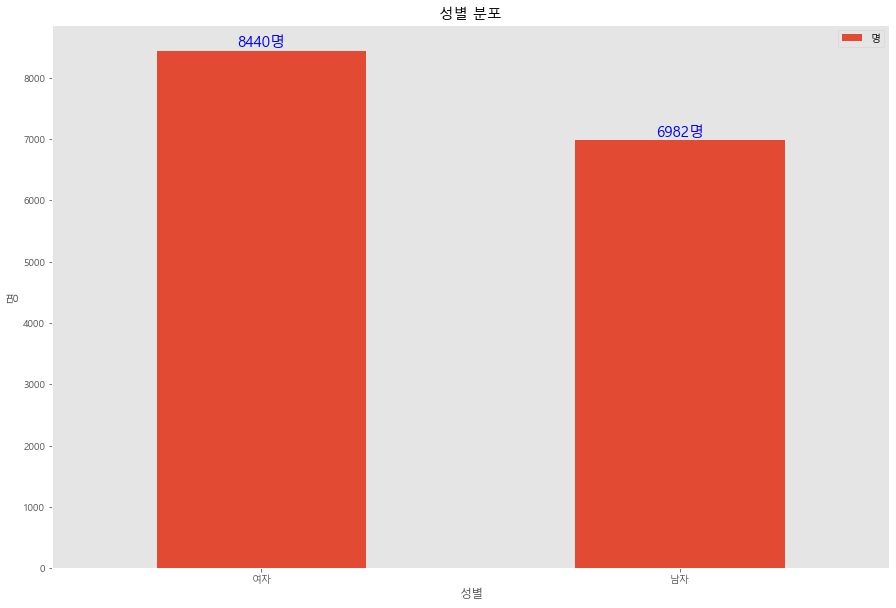

In [111]:

gender_frm.plot(kind='bar' , rot = 0 , figsize = (15, 10))

for idx, value in enumerate( list(gender_frm['명']) ) :

    print(idx, value)
    txt = '%d명' % value
    plt.text(idx , value , txt , 
             horizontalalignment = 'center' , 
             verticalalignment   = 'bottom' , 
             fontsize = 15 , 
             color = 'blue')

plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('명')
plt.grid(False)


plt.show()
plt.close()

성별 분포에 따른 시각화 - pie 


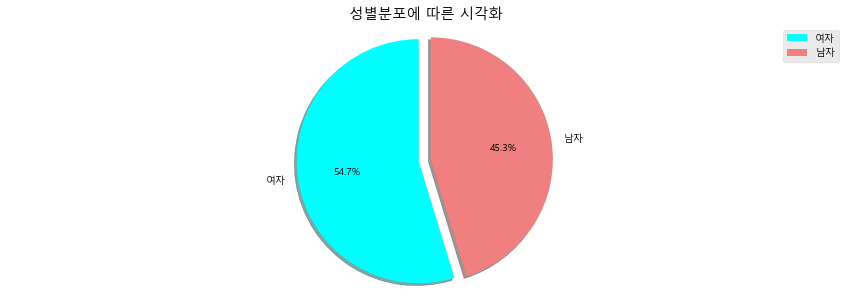

In [114]:
print('성별 분포에 따른 시각화 - pie ')

plt.figure( figsize = (15, 5))
plt.style.use('ggplot')

explode = (0.1, 0)
colors  = ['cyan' , 'lightcoral'] 
plt.pie(gender_frm['명'] , 
        labels = gender_frm.index ,
        shadow = True , 
        autopct = '%1.1f%%' , 
        startangle = 90 ,
        explode = explode , 
        colors = colors)

plt.title('성별분포에 따른 시각화')
plt.legend(labels = gender_frm.index , loc = 'best')

plt.axis('equal')
plt.show()
plt.close()


[요구사항01]
#### 성별에 따른 평균 급여 차이를 분석
- 성별과 월급 데이터만 추출
- 성별을 남자와 여자로 변환
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(성별로 그룹화하여 그룹별 평균)
- 데이터 시각화

[요구사항02]
#### 나이에 따른 평균 급여 변화
- 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(나이별 따른 급여평균)
- 데이터 시각화

[요구사항03]
#### 연령때에 따른 분포

[요구사항04]
#### 연령대별 평귭 급여 변화

[요구사항05]
#### 성별과 연령대 분포 

[요구사항06]
#### 성별과 연령대에 따른 평균 급여 변화

[요구사항07]
#### 지역별 연령층 분포와 연령층별 지역비율
